In [2]:
pip install pydub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
pip install numba==0.48


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.5 MB 9.0 MB/s 
     |████████████████████████████████| 20.2 MB 1.1 MB/s 
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.34.0
    Uninstalling llvmlite-0.34.0:
      Successfully uninstalled llvmlite-0.34.0
  Attempting uninstall: numba
    Found existing installation: numba 0.51.2
    Uninstalling numba-0.51.2:
      Successfully uninstalled numba-0.51.2


In [4]:
import pandas as pd
import numpy as np
import librosa.display
from scipy.io import wavfile as wav
import tensorflow as tf
from pathlib import Path
from sklearn import preprocessing
from sklearn.neural_network import MLPClassifier
from librosa import load
from librosa.util import fix_length
import os
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from scipy.io.wavfile import read


In [5]:
from scipy.io import wavfile
from scipy import signal

In [6]:
import sys
import sklearn
print(sys.version)
!python --version
print("numpy:",np.__version__)
print("sklearn:",sklearn.__version__)

3.7.13 (default, Apr 24 2022, 01:04:09) 
[GCC 7.5.0]
Python 3.7.13
numpy: 1.21.6
sklearn: 1.0.2


In [7]:
data_path='/content/drive/MyDrive/soundsdataset/'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]
label_dict=dict(zip(categories,labels)) 
print(label_dict)


{'HIGH FREQUENCY SOUND': 0, 'LOW FREQUENCY SOUND': 1}


In [8]:
x=[]
y=[]

for category in categories:
   folder_path=os.path.join(data_path,category)
   aud_names=os.listdir(folder_path)
   for aud in aud_names:
       aud_path=os.path.join(folder_path,aud)    
       try:
          X, sample_rate = wav.read(aud_path)
          sf = 11025 # sampling frequency of wav file
          required_audio_size = 5 # audio of size 2 second needs to be padded to 5 seconds
          audio, sf = librosa.load(aud_path, sr=sf, mono=True) # mono=True converts stereo audio to mono
          padded_audio = fix_length(audio, size=5*sf) # array size is required_audio_size*sampling frequency
         #print(count,np.shape(padded_audio))
          mfcc = librosa.feature.mfcc(y=padded_audio, sr=11025, n_mfcc=40)
          mfccscaled = np.mean(mfcc.T,axis=0)
          x.append(mfccscaled)
          y.append(label_dict[category])
       except Exception as e:
           print('Exception:',e)


In [9]:
np.save('/content/drive/MyDrive/soundsdataset/x',x)
np.save('/content/drive/MyDrive/soundsdataset/y',y)

In [10]:

x=np.load('/content/drive/MyDrive/soundsdataset/x.npy')
y=np.load('/content/drive/MyDrive/soundsdataset/y.npy')

In [11]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.25, random_state=0)


In [12]:
sc=StandardScaler()

scaler = sc.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [13]:
clf = MLPClassifier(random_state=1, max_iter=200).fit(x_train_scaled, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [14]:
clf = MLPClassifier(hidden_layer_sizes=(4,4),random_state=5,verbose=True,activation = 'relu',solver = 'sgd',learning_rate_init=0.009)


In [15]:
clf.fit(x_train_scaled,y_train)


Iteration 1, loss = 0.77665432
Iteration 2, loss = 0.76516201
Iteration 3, loss = 0.75143250
Iteration 4, loss = 0.73644388
Iteration 5, loss = 0.72588129
Iteration 6, loss = 0.71602418
Iteration 7, loss = 0.70607003
Iteration 8, loss = 0.69766548
Iteration 9, loss = 0.69044093
Iteration 10, loss = 0.68404674
Iteration 11, loss = 0.67957118
Iteration 12, loss = 0.67529566
Iteration 13, loss = 0.67131442
Iteration 14, loss = 0.66795421
Iteration 15, loss = 0.66503424
Iteration 16, loss = 0.66261848
Iteration 17, loss = 0.66029093
Iteration 18, loss = 0.65797243
Iteration 19, loss = 0.65577245
Iteration 20, loss = 0.65362689
Iteration 21, loss = 0.65172351
Iteration 22, loss = 0.64981226
Iteration 23, loss = 0.64790538
Iteration 24, loss = 0.64616817
Iteration 25, loss = 0.64376373
Iteration 26, loss = 0.64006318
Iteration 27, loss = 0.63516935
Iteration 28, loss = 0.63048550
Iteration 29, loss = 0.62618643
Iteration 30, loss = 0.62277643
Iteration 31, loss = 0.61886523
Iteration 32, los

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(hidden_layer_sizes=(4, 4), learning_rate_init=0.009,
              random_state=5, solver='sgd', verbose=True)

In [16]:
y_pred=clf.predict(x_test_scaled)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [17]:

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8467741935483871

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


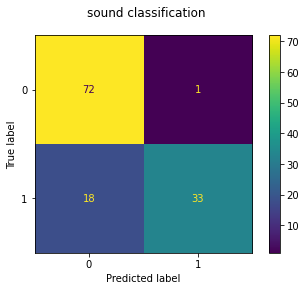

In [18]:
fig = plot_confusion_matrix(clf, x_test_scaled, y_test,display_labels=clf.classes_)
fig.figure_.suptitle("sound classification")
plt.show()

In [19]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.80      0.99      0.88        73
           1       0.97      0.65      0.78        51

    accuracy                           0.85       124
   macro avg       0.89      0.82      0.83       124
weighted avg       0.87      0.85      0.84       124



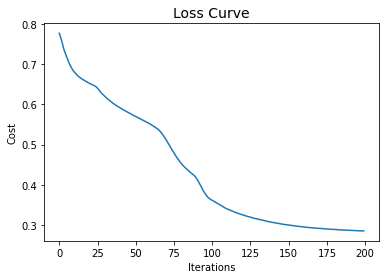

In [20]:
plt.plot(clf.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [21]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(clf, open(filename, 'wb'))

In [22]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))


In [23]:
import IPython.display as ipd
filepath='/content/drive/MyDrive/TEST SOUND.wav'
ipd.Audio(filepath)


In [24]:
data, sample_rate =librosa.load(filepath)

In [25]:
print(sample_rate,data)

22050 [-2.5262618e-06  2.2716529e-05  2.5055779e-06 ...  2.1999530e-01
  2.2635454e-01  0.0000000e+00]


In [26]:
np.array(data)
np.array(sample_rate)

array(22050)

In [27]:
sf= 11025 # sampling frequency of wav file
required_audio_size = 5 # audio of size 2 second needs to be padded to 5 seconds
data, sf = librosa.load(filepath, sr=11025, mono=True) # mono=True converts stereo audio to mono
padded_audio_1 = fix_length(data, size=5*11025) # array size is required_audio_size*sampling frequency


In [28]:

mfcc_1 = librosa.feature.mfcc(y=padded_audio_1, sr=sf, n_mfcc=40)#mfcc features
mfccscaled_1 = np.mean(mfcc_1.T,axis=0)#mfcc scaled features
mfccscaled_1

array([-215.9986   ,  173.44327  ,  -64.18036  ,  -78.404594 ,
        -38.72603  ,  -13.158718 ,   -7.042331 ,   -4.1401567,
         -9.883026 ,   -1.6431183,    3.66835  ,   11.252033 ,
          4.821897 ,    2.3846126,    0.5528256,   11.843553 ,
         12.564434 ,   11.141931 ,    6.031385 ,    5.3362894,
          6.209878 ,    9.804943 ,    5.6381207,    3.4628477,
          2.5558074,    6.608156 ,    8.32704  ,    6.8811197,
          3.5381117,    2.148978 ,    3.4265628,    5.931165 ,
          6.294933 ,    4.8800783,    4.0335526,    4.012659 ,
          5.372222 ,    4.8557224,    4.568172 ,    3.3097885],
      dtype=float32)

In [29]:
mfccscaled_= np.reshape(mfccscaled_1, (1, 40))

In [30]:
mfccscaled_.shape


(1, 40)

In [31]:
audio_predict=clf.predict(mfccscaled_) 


In [32]:
predicted_label=np.argmax(audio_predict,axis=0)
print(predicted_label)

0


In [33]:
sr, aud = wavfile.read('/content/drive/MyDrive/TEST SOUND.wav')     



In [35]:
b = signal.firwin(101, cutoff=3000, fs=sr, pass_zero=False)

aud = signal.lfilter(b, [1.0], aud)

wavfile.write('test.wav', sr, aud.astype(np.int16))

In [37]:
pure='/content/test.wav'
ipd.Audio(pure)
